# Decision tree based machine learning

## Imports

In [14]:
# play with the data
import kaggle
import pandas as pd
import numpy as np
from sklearn import preprocessing #standard ddf=0 biased var ok!


#learning tools: when there is classifier -> discrete, regressor -> continuous
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor


#graphics
from mlxtend.plotting import plot_decision_regions  #visualize decisions
import matplotlib.pyplot as plt
from graphviz import Source
from IPython.display import SVG
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("colorblind"))
%matplotlib notebook

In [10]:
try:
    kaggle.api.authenticate()
except:
    print("Authentification could not be done: check that your key is correct.")

    
!kaggle datasets download uciml/breast-cancer-wisconsin-data --unzip
!kaggle datasets download uciml/autompg-dataset --unzip
!kaggle datasets download jeevannagaraj/indian-liver-patient-dataset --unzip
!kaggle competitions download -c bike-sharing-demand --force

You already have a .json file ready to authenticate yourself.
  0%|                                               | 0.00/48.6k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 763kB/s]
  0%|                                               | 0.00/6.31k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 6.31k/6.31k [00:00<00:00, 8.64MB/s]
  0%|                                               | 0.00/7.65k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 7.65k/7.65k [00:00<00:00, 14.2MB/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 1.59MB/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 1.58MB/s]


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Training-and-accuracy" data-toc-modified-id="Training-and-accuracy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training and accuracy</a></span><ul class="toc-item"><li><span><a href="#Dataset-breast-cancer" data-toc-modified-id="Dataset-breast-cancer-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dataset breast cancer</a></span></li><li><span><a href="#Decision-tree-and-logistic-regression" data-toc-modified-id="Decision-tree-and-logistic-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision tree and logistic regression</a></span></li><li><span><a href="#Gini-criterion" data-toc-modified-id="Gini-criterion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gini criterion</a></span></li><li><span><a href="#Entropy-criterion" data-toc-modified-id="Entropy-criterion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Entropy criterion</a></span></li><li><span><a href="#Dataset-auto-mpg-and-regression" data-toc-modified-id="Dataset-auto-mpg-and-regression-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Dataset auto-mpg and regression</a></span><ul class="toc-item"><li><span><a href="#Decision-tree-regresssion" data-toc-modified-id="Decision-tree-regresssion-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Decision tree regresssion</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Linear Regression</a></span></li></ul></li></ul></li><li><span><a href="#Generalization-error" data-toc-modified-id="Generalization-error-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generalization error</a></span><ul class="toc-item"><li><span><a href="#Overfitting-and-underfitting" data-toc-modified-id="Overfitting-and-underfitting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overfitting and underfitting</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#Ensemble-learning:-Voting-classifier" data-toc-modified-id="Ensemble-learning:-Voting-classifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ensemble learning: Voting classifier</a></span></li></ul></li><li><span><a href="#Bagging-and-random-forests" data-toc-modified-id="Bagging-and-random-forests-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bagging and random forests</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Out-of-bag-evaluation" data-toc-modified-id="Out-of-bag-evaluation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Out of bag evaluation</a></span></li><li><span><a href="#Random-forests" data-toc-modified-id="Random-forests-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Random forests</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Boosting</a></span><ul class="toc-item"><li><span><a href="#AdaBoost-(AdaB)" data-toc-modified-id="AdaBoost-(AdaB)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>AdaBoost (AdaB)</a></span></li><li><span><a href="#Gradient-boosting-(GB)" data-toc-modified-id="Gradient-boosting-(GB)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Gradient boosting (GB)</a></span></li><li><span><a href="#Stochastic-gradient-boosting-(SGB)" data-toc-modified-id="Stochastic-gradient-boosting-(SGB)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Stochastic gradient boosting (SGB)</a></span></li></ul></li><li><span><a href="#Tuning-hyperparameters-with-grid-search" data-toc-modified-id="Tuning-hyperparameters-with-grid-search-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tuning hyperparameters with grid search</a></span><ul class="toc-item"><li><span><a href="#Tree-parameters" data-toc-modified-id="Tree-parameters-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Tree parameters</a></span></li><li><span><a href="#Random-forests" data-toc-modified-id="Random-forests-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random forests</a></span></li></ul></li></ul></div>

## Training and accuracy
### Dataset breast cancer

In [11]:
df_breast = pd.read_csv('data.csv')
real_cols = [x for x in df_breast.columns if not x.startswith("Unnamed: ")]
df_breast = df_breast[real_cols]

# handle categories as numerical for logreg
df_breast['diagnosis'] = df_breast['diagnosis'].astype('category').cat.codes
df_breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Decision tree and logistic regression

In [12]:
SEED = 1

x = df_breast[["radius_mean", "concave points_mean"]]
y = df_breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.2,
                                                    stratify=y,
                                                    random_state=SEED)


# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

<IPython.core.display.Javascript object>


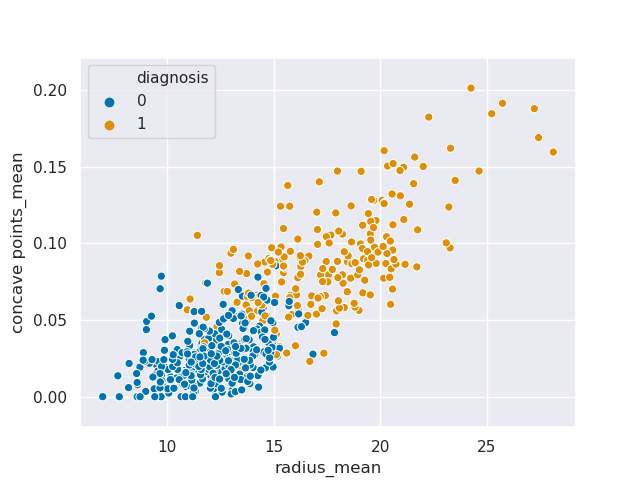

In [15]:
plt.figure()
sns.scatterplot(x="radius_mean", y="concave points_mean",
                hue="diagnosis", data=df_breast)
plt.show()

In [6]:
# Predict test set labels
y_pred = dt.predict(x_test)
print(y_pred[0:5])

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

[0 0 0 1 0]
Test set accuracy: 0.89


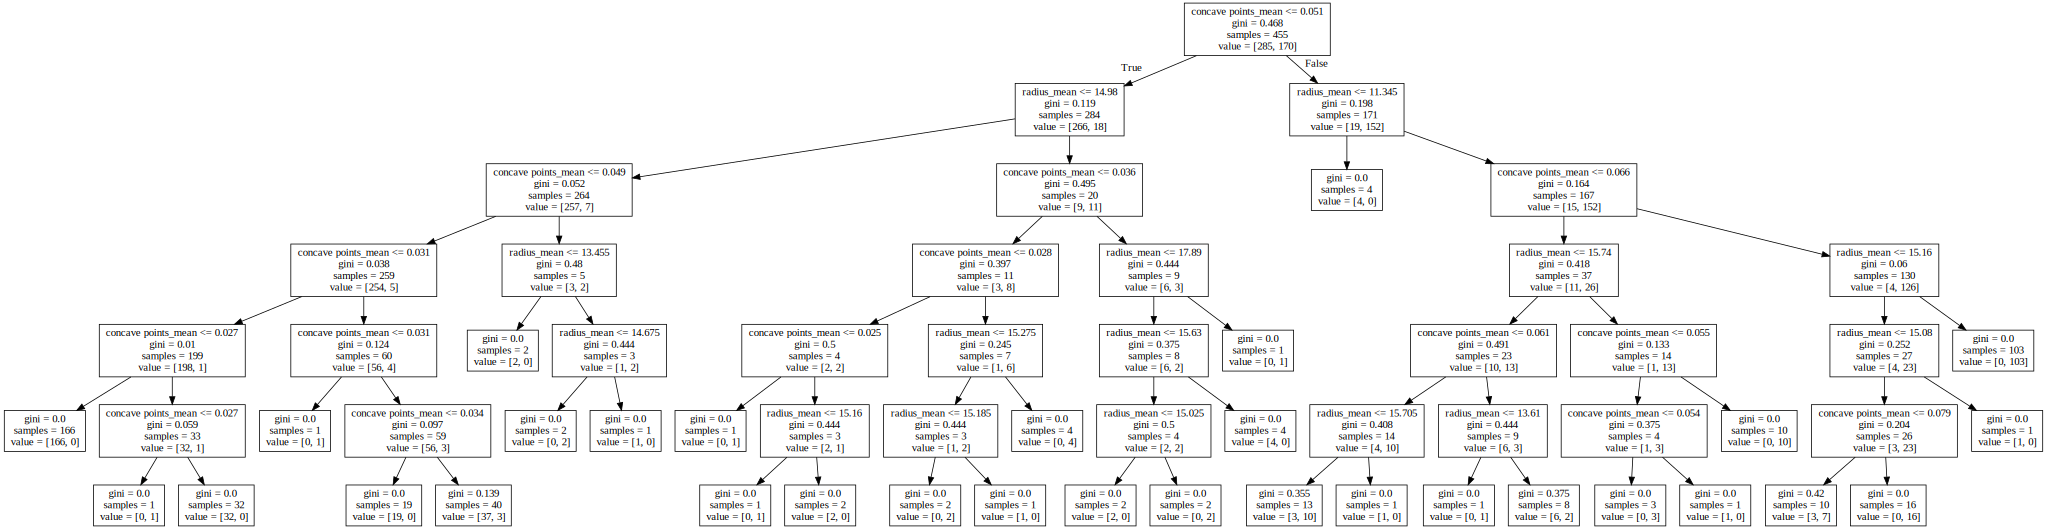

In [7]:
Source( export_graphviz(dt, out_file=None, feature_names=x_train.columns))
graph = Source( export_graphviz(dt, out_file=None, feature_names=x_train.columns))
SVG(graph.pipe(format='svg'))

The decision tree makes separations in rectangles whereas the logistic regression separates the space into two groups. Let's see that behavior.

In [8]:
# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(x_train, y_train)

# accuracy score
acc_logreg = accuracy_score(y_test, logreg.predict(x_test))
print("Test set accuracy: {:.2f}".format(acc_logreg))

Test set accuracy: 0.89


<IPython.core.display.Javascript object>


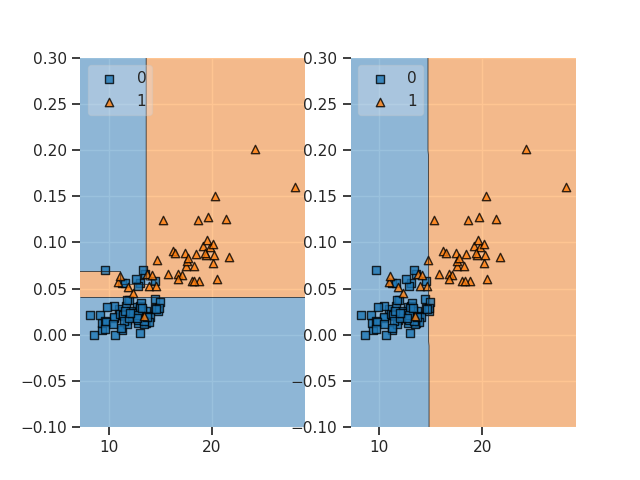

In [9]:
# classifiers:
clfs = [dt, logreg]

plt.figure()
for i, clf in enumerate(clfs):
    clf.fit(x_test, y_test)
    plt.subplot(1, 2, i+1)
    plot_decision_regions(X=x_test.values, y=y_test.values, clf=clf, legend=2)
    plt.ylim([-.1, .3])
plt.show()

### Gini criterion
We can use the gini criteria $I_G(f)=1-\sum f_i^2$ (the one used by default)

In [10]:
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=SEED)
dt_gini.fit(x_train, y_train)
acc_dt_gini = accuracy_score(y_test, dt_gini.predict(x_test))

print("Test set accuracy: {:.2f}".format(acc_dt_gini))

Test set accuracy: 0.92


<IPython.core.display.Javascript object>


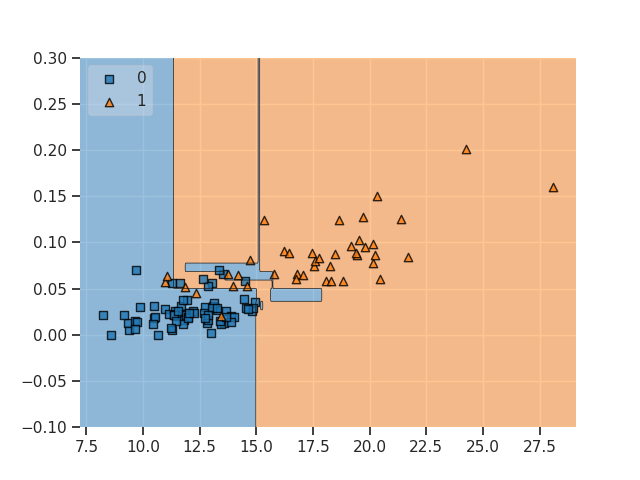

In [11]:
plt.figure()
plot_decision_regions(X=x_test.values, y=y_test.values, clf=dt_gini, legend=2)
plt.ylim([-0.1, 0.3])
plt.show()

### Entropy criterion
Or we can use $I_G(f)=-\sum f_i\log_2(f_i)$. (same results most of the time, Gini is faster to compute)

In [12]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=SEED)

# Fit dt_entropy to the training set
dt_entropy.fit(x_train, y_train)
dt_gini.fit(x_train, y_train)

#accuracies
acc_dt_gini = accuracy_score(y_test, dt_gini.predict(x_test))
acc_dt_entropy = accuracy_score(y_test, dt_entropy.predict(x_test))

print("Test set accuracy for gini: {:.2f}".format(acc_dt_gini))
print("Test set accuracy for entropy: {:.2f}".format(acc_dt_entropy))

Test set accuracy for gini: 0.92
Test set accuracy for entropy: 0.89


### Dataset auto-mpg and regression

In [13]:
df_auto = pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<IPython.core.display.Javascript object>


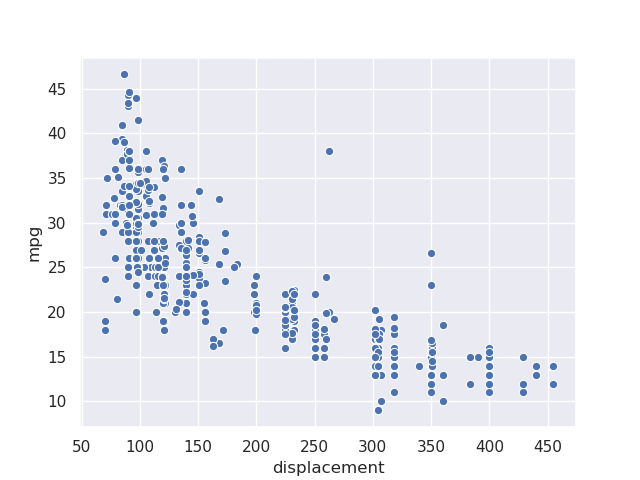

In [14]:
plt.figure()
sns.scatterplot(x="displacement", y="mpg", data=df_auto)
plt.show()

#### Decision tree regresssion

In [15]:
df_auto.replace('?', np.nan, inplace=True)
df_auto = df_auto.dropna() #scikit can't handle well nans, must use an Imputer othws
y = df_auto['mpg'] #milespergallon consumption
design_origin = pd.Series(df_auto['origin']).astype('str').str.get_dummies() #separate the 3 origins in a dummy matrix
X = pd.concat([df_auto[["displacement", "horsepower", "weight", "acceleration"]],
               design_origin], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

#train and predict the continuous data
dt = DecisionTreeRegressor(
                max_depth=4,
                min_samples_leaf=.13, #stop cond: each leaf have 13% of the training data
                random_state=SEED)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# compute MSE
mse = MSE(y_test, y_pred)

print("Root mean square={:1.2f}".format(mse**.5))

Root mean square=4.75


#### Linear Regression

In [16]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
lr.fit(X_train, y_train)
print("Score=", lr.score(X_train, y_train))

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_pred_lr, y_test)

# Compute rmse_lr
rmse_lr = mse_lr**.5

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

Score= 0.717062856783645
Linear Regression test set RMSE: 4.41


## Generalization error
### Overfitting and underfitting
Bias -> underfitting

variance -> overfitting

MSE for overfitting: 27.27
MSE for underfitting: 30.79


<IPython.core.display.Javascript object>


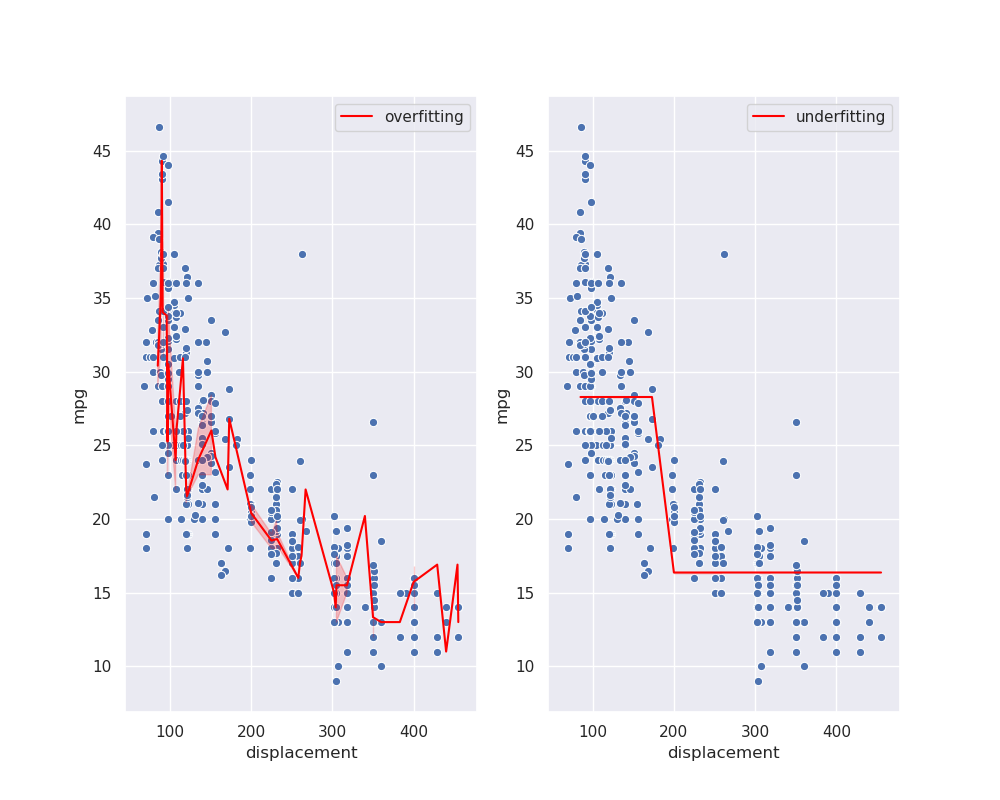

In [17]:
dt_over = DecisionTreeRegressor(
                max_depth=120,
                min_samples_leaf=.001,
                random_state=SEED)
dt_over.fit(X_train, y_train)
y_pred_over = dt_over.predict(X_test)
mse_over = MSE(y_pred_over, y_test)
print('MSE for overfitting: {:.2f}'.format(mse_over))

dt_under = DecisionTreeRegressor(
                max_depth=1,
                random_state=SEED)
dt_under.fit(X_train, y_train)
y_pred_under = dt_under.predict(X_test)
mse_under = MSE(y_pred_under, y_test)
print('MSE for underfitting: {:.2f}'.format(mse_under))

plt.figure(figsize=(10,8))
ax1 = plt.subplot(121, adjustable='box')
sns.scatterplot(x="displacement", y="mpg", data=df_auto)
sns.lineplot(x=X_test["displacement"], y=y_pred_over, color='red', label="overfitting")

plt.subplot(122, adjustable='box', sharex=ax1, sharey=ax1)
sns.scatterplot(x="displacement", y="mpg", data=df_auto)
sns.lineplot(x=X_test["displacement"], y=y_pred_under, color='red', label="underfitting")
plt.show()

### Cross validation
$K$-fold: 

* Subdivise the data into a partition of $K$ parts $K_1,\dots,K_K$,
* Compute the error of the model when the test part is $K_i$ for $i=1,\dots,K$,
* Compute the mean of the $K$ errors. 

If $CV$ error $>$ training-set error: overfitting.

If $CV$ error $\simeq$ training-set error but very large: underfitting.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=.3,
                                                   random_state=SEED)
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=.14,
                           random_state=SEED)

MSE_cv = - cross_val_score(dt, X_train, y_train, cv=10,
                        scoring="neg_mean_squared_error", n_jobs=-1)

print("mean MSE_cv=", MSE_cv.mean())

dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

mse_train = MSE(y_pred_train, y_train)
print("MSE training set=", mse_train, "-> overfitting!")

mse_test = MSE(y_pred_test, y_test)
print("MSE test set=", mse_test, ": very close to MEAN cv_error!")

mean MSE_cv= 17.585833811840658
MSE training set= 13.412918751429702 -> overfitting!
MSE test set= 18.80539792564418 : very close to MEAN cv_error!


### Ensemble learning: Voting classifier

* $N$ classifiers make binary predictions: $P_i\in\{0,1\}$.
* Send each result to create a meta-model

In [19]:
df_liver = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df_quanti = df_liver[['age', "tot_bilirubin", "direct_bilirubin", "tot_proteins",
                     "albumin", "ag_ratio", "sgpt", "sgot", "alkphos"]]
df_quanti = pd.DataFrame(preprocessing.scale(df_quanti),
                         columns = ['age', "tot_bilirubin", "direct_bilirubin", "tot_proteins",
                     "albumin", "ag_ratio", "sgpt", "sgot", "alkphos"])
df_liver['gender'] = df_liver['gender'].astype('category').cat.codes
df_liver['is_patient'] = 1-df_liver['is_patient'].astype('category').cat.codes
X = pd.concat([df_quanti, df_liver[["gender", "is_patient"]]], axis=1)
X = X.dropna()
X.head(7)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender,is_patient
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390,0,1
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461,1,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707,1,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780,1,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237,1,1
5,0.077514,-0.241578,-0.280143,-0.340199,-0.338224,-0.332250,1.029773,1.582902,1.105288,1,1
6,-1.158890,-0.386642,-0.458327,-0.562669,-0.354665,-0.339178,0.476533,0.450593,0.165780,0,1


In [20]:
x = X.drop(['is_patient'], axis=1)
y = X['is_patient']

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.3,
                                                    stratify=y,
                                                    random_state=SEED)
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

In [21]:
classifiers = [("logistic regression", lr),
               ("knn", knn),
               ("Decision tree", dt)]

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("{:s} : {:.4f}".format(name, accuracy_score(y_pred, y_test)))

logistic regression : 0.6782
knn : 0.6379
Decision tree : 0.6092


In [22]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print("With the voting classifier : {:.4}".format(accuracy_score(y_pred, y_test)))

With the voting classifier : 0.6724


## Bagging and random forests
### Bagging
* Voting classifier: same training set diff algo
* Bagging: diff subsets of the training set, same algo -> subsets chosen with-replacement

In [23]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=.16, random_state=SEED)
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print("With the bagging classifier : {:.4}".format(accuracy_score(y_pred, y_test)))

With the bagging classifier : 0.7126


### Out of bag evaluation
When baggin, a part of the training set is not chosen: OOB -> use that instead of CV

In [24]:
bc_oob = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1,
                           oob_score=True)

bc_oob.fit(X_train, y_train)
y_pred_oob = bc_oob.predict(X_test)

print("With the oob, test score : {:.4}".format(accuracy_score(y_pred_oob, y_test)))
print("With the oob, OOb accuracy : {}".format(bc_oob.oob_score_))

With the oob, test score : 0.7126
With the oob, OOb accuracy : 0.6987654320987654


### Random forests
* Base estimator: decision tree
* a number of features are sampled at each node (no replacement)
* Can measure the importance of a feature (tree based)

In [25]:
!unzip -o bike-sharing-demand.zip
!rm bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [26]:
data_bike =pd.read_csv('train.csv')

data_bike["datetime"] = pd.to_datetime(data_bike["datetime"])
data_bike["day"] = data_bike['datetime'].map(lambda x: x.day)
data_bike["month"] = data_bike['datetime'].map(lambda x: x.month)
data_bike["year"] = data_bike['datetime'].map(lambda x: x.year)
data_bike["hour"] = data_bike['datetime'].map(lambda x: x.hour)
data_bike['year'].replace(2011, 1, inplace=True)

design_weather = pd.Series(data_bike['weather']).astype('str').str.get_dummies() #separate the 3 origins in a dummy matrix
design_weather.columns = ["clear", "mist", "light_precip", "heavy"]
data_bike = pd.concat([data_bike[["day", "month", "year", "hour", "holiday", "workingday", "temp",
                          "humidity", "windspeed", "count"]],
                       design_weather[["clear", "light_precip", "mist"]]],
                       axis=1)
data_bike = data_bike[data_bike['year'] == 1] #only 2011
data_bike = data_bike[(data_bike['month'] == 7) | (data_bike['month'] == 8)] #only summer

data_bike.head()


,day,month,year,hour,holiday,workingday,temp,humidity,windspeed,count,clear,light_precip,mist
2690,1,7,1,0,0,1,27.06,50,0.0,68,1,0,0
2691,1,7,1,1,0,1,27.06,50,0.0,31,1,0,0
2692,1,7,1,2,0,1,25.42,69,0.0,13,1,0,0
2693,1,7,1,3,0,1,26.24,53,0.0,11,1,0,0
2694,1,7,1,4,0,1,25.42,57,0.0,6,1,0,0


In [27]:
x, y = data_bike.drop("count", axis=1), data_bike["count"]
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.3,
                                                    random_state=SEED)

In [28]:
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** .5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=.14,
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred_dt) ** .5

# Print rmse_test
print('Test set RMSE of one decision tree: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 44.35
Test set RMSE of one decision tree: 106.08


In [29]:
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances.sort_values(ascending=False, inplace=True)
# Draw a horizontal barplot of importances_sorted

<IPython.core.display.Javascript object>


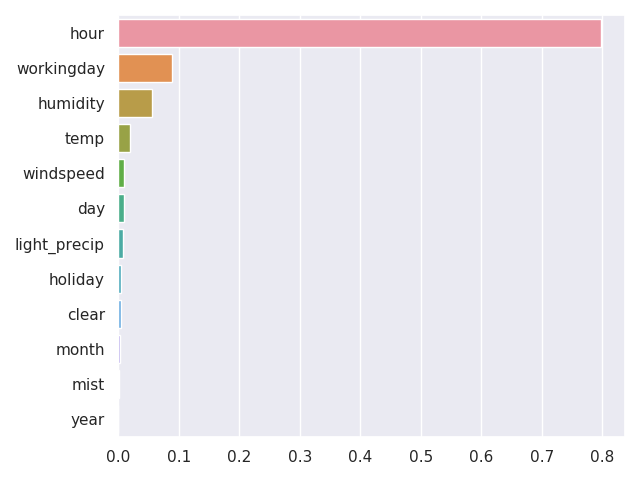

In [30]:
fig, ax = plt.subplots()
sns.set_color_codes("pastel")
sns.barplot(importances.values,importances.index)
plt.tight_layout()
plt.show()

## Boosting
* Ensemble of predictors are trained
* Each new predictor tries to correct the error from its predecessor

### AdaBoost (AdaB)
-> Adaptive Boosting

* For instances wrongly predicted achieved by changing weights of training instances
* Each predictor is assigned a coef $\alpha$ depending of the prediictor training's error
* use of a learning rate $\eta$ which shrinks the coefficients $\alpha_i$ to $\eta \alpha_i$
* tradeoff between number of estimators and $\eta$ close to $0$


In [32]:
# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=SEED)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [39]:
# Let's take back the liver data
X = pd.concat([df_quanti, df_liver[["gender", "is_patient"]]], axis=1)
X = X.dropna()
x = X.drop(['is_patient'], axis=1)
y = X['is_patient']

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.3,
                                                    stratify=y,
                                                    random_state=SEED)
ada.fit(X_train, y_train)
pred = ada.predict_proba(X_test)
print(pred[1:5,:])
y_pred_proba = pred[:,1]

[[0.41756934 0.58243066]
 [0.44023099 0.55976901]
 [0.49085183 0.50914817]
 [0.46326599 0.53673401]]


* ROC: curve of real-positive against false positive
* AUC: Aire under curve

In [40]:
# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc)) #not bad for an untuned test

ROC AUC score: 0.70


### Gradient boosting (GB)
* Also sequentiel, but doesn't use weights
* Each predictor uses the residual errors $r_i$ from the last one as labels
* Also a shrinkage parameter before the residuals
* $y_{pred}=y_1 + \sum_{i=1}^N \eta r_i$ 

In [44]:
# On the bikes
x, y = data_bike.drop("count", axis=1), data_bike["count"]
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.3,
                                                    random_state=SEED)

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=SEED)

In [46]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_pred, y_test)

# Compute RMSE
rmse_test = mse_test ** .5

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 46.234


### Stochastic gradient boosting (SGB)
* Each tree is trained on a random subsets rows training data
* instances are sampled without replacement, idem for features when choosing split points

In [47]:
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=.9, #90% of the rows
            max_features=.75, #75% of the cols when splitting choice
            n_estimators=200,                                
            random_state=SEED)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test ** .5

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test)) #usually, it's lower...

Test set RMSE of sgbr: 47.517


## Tuning hyperparameters with grid search
-> grid search is expensive!!
### Tree parameters
* Set a discrete grid of hyperparameters
* Set a metric for the accuracy
* Search through the whole grid
* Evaluate each model cv score
* Take the one with the best score

**!!!!!Curse of dimensionality!!!!!**

If a dataset is imbalanced (under-represented class), use the ROC AUC score instead of the accuracy. For regressions, the $R^2$ can be used.

In [56]:
# Go back to using the liver
X = pd.concat([df_quanti, df_liver[["gender", "is_patient"]]], axis=1)
X = X.dropna()
x = X.drop(['is_patient'], axis=1)
y = X['is_patient']

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.3,
                                                    stratify=y,
                                                    random_state=SEED)

In [57]:
dt = DecisionTreeClassifier(random_state=SEED)
#dt.get_params()
params_dt = {'max_depth': [2, 3, 4],
             'min_samples_leaf': [.12, .14, .16, .18]
            }

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)


# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.682


### Random forests

In [59]:
# Use bikes
x, y = data_bike.drop("count", axis=1), data_bike["count"]
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.3,
                                                    random_state=SEED)

rf = RandomForestRegressor(random_state=SEED)
rf.get_params()
# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100, 350, 500],
             "max_features": ['log2', "auto", "sqrt"],
             'min_samples_leaf': [2, 10, 30]
}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [60]:
grid_rf.fit(X_train, y_train)
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** .5

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    4.5s finished


Test RMSE of best model: 44.685
